<a href="https://colab.research.google.com/github/kmanoj94/CS809/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#pollution dataset uploaded from local drive 
from google.colab import files
files.upload()

Saving Pollution.csv to Pollution.csv


{'Pollution.csv': b'CITY,SO2,MANUF,POP,TEMP,WIND,PRECIP-IN,PRECIP-DAY\r\nPhoenix,10,213,582,70.3,6,7.05,36\r\nLittle Rock,13,91,132,61,8.2,48.52,100\r\nSan Francisco,12,453,716,56.7,8.7,20.66,67\r\nDenver,17,454,515,51.9,9,12.95,86\r\nHartford,56,412,158,49.1,9,43.37,127\r\nWilmington,36,80,80,54,9,40.25,114\r\nWashington,29,434,757,57.3,9.3,38.89,111\r\nJacksonville,14,136,529,68.4,8.8,54.47,116\r\nMiami,10,207,335,75.5,9,59.8,128\r\nAtlanta,24,368,497,61.5,9.1,48.34,115\r\nChicago,110,3344,3369,50.6,10.4,34.44,122\r\nIndianapolis,28,361,746,52.3,9.7,38.74,121\r\nDes Moines,17,104,201,49,11.2,30.85,103\r\nWichita,8,125,277,56.6,12.7,30.58,82\r\nLouisville,30,291,593,55.6,8.3,43.11,123\r\nNew Orleans,9,204,361,68.3,8.4,56.77,113\r\nBaltimore,47,625,905,55,9.6,41.31,111\r\nDetroit,35,1064,1513,49.9,10.1,30.96,129\r\nMinneapolis-St. Paul,29,699,744,43.5,10.6,25.94,137\r\nKansas City,14,381,507,54.5,10,37,99\r\nSt. Louis,56,775,622,55.9,9.5,35.89,105\r\nOmaha,14,181,347,51.5,10.9,30.18,98

In [4]:
data=pd.read_csv("Pollution.csv")

In [5]:
data.shape

(41, 8)

In [7]:
data.head(41)

,CITY,SO2,MANUF,POP,TEMP,WIND,PRECIP-IN,PRECIP-DAY
0,Phoenix,10,213,582,70.3,6.0,7.05,36
1,Little Rock,13,91,132,61.0,8.2,48.52,100
2,San Francisco,12,453,716,56.7,8.7,20.66,67
3,Denver,17,454,515,51.9,9.0,12.95,86
4,Hartford,56,412,158,49.1,9.0,43.37,127
5,Wilmington,36,80,80,54.0,9.0,40.25,114
6,Washington,29,434,757,57.3,9.3,38.89,111
7,Jacksonville,14,136,529,68.4,8.8,54.47,116
8,Miami,10,207,335,75.5,9.0,59.80,128
9,Atlanta,24,368,497,61.5,9.1,48.34,115


In [9]:
CITY=data['CITY']
#dropping city fetaure because it's string value
Data=data.drop("CITY",axis=1)
print(Data.shape)


(41, 7)


In [11]:
#defining covariance matrix
cov_matrix=np.cov(Data.T)
print(cov_matrix)
cov_matrix.shape

[[ 5.50947561e+02  8.52772012e+03  6.71199451e+03 -7.35606707e+01
   3.17530488e+00  1.50017988e+01  2.29929878e+02]
 [ 8.52772012e+03  3.17502890e+05  3.11718814e+05 -7.73971341e+02
   1.91548110e+02 -2.15019902e+02  1.96895976e+03]
 [ 6.71199451e+03  3.11718814e+05  3.35371894e+05 -2.62349634e+02
   1.75930061e+02 -1.78052890e+02  6.45985976e+02]
 [-7.35606707e+01 -7.73971341e+02 -2.62349634e+02  5.22398780e+01
  -3.61135366e+00  3.28629884e+01 -8.24261585e+01]
 [ 3.17530488e+00  1.91548110e+02  1.75930061e+02 -3.61135366e+00
   2.04102439e+00 -2.18531098e-01  6.21439024e+00]
 [ 1.50017988e+01 -2.15019902e+02 -1.78052890e+02  3.28629884e+01
  -2.18531098e-01  1.38569384e+02  1.54792902e+02]
 [ 2.29929878e+02  1.96895976e+03  6.45985976e+02 -8.24261585e+01
   6.21439024e+00  1.54792902e+02  7.02590244e+02]]


(7, 7)

In [12]:
#defining correlation matrix
corr_matrix = pd.DataFrame.corr(Data, method='pearson')
print(corr_matrix)
corr_matrix.shape

                 SO2     MANUF       POP  ...      WIND  PRECIP-IN  PRECIP-DAY
SO2         1.000000  0.644769  0.493780  ...  0.094690   0.054294    0.369564
MANUF       0.644769  1.000000  0.955269  ...  0.237947  -0.032417    0.131829
POP         0.493780  0.955269  1.000000  ...  0.212644  -0.026119    0.042083
TEMP       -0.433600 -0.190042 -0.062678  ... -0.349740   0.386253   -0.430242
WIND        0.094690  0.237947  0.212644  ...  1.000000  -0.012994    0.164106
PRECIP-IN   0.054294 -0.032417 -0.026119  ... -0.012994   1.000000    0.496097
PRECIP-DAY  0.369564  0.131829  0.042083  ...  0.164106   0.496097    1.000000

[7 rows x 7 columns]


(7, 7)

In [13]:
#finding eigen values and eigen vectors 
eig_values, eig_vectors = np.linalg.eig(corr_matrix)

In [14]:
#eigen vector 7x7 matrix
print('Eigenvectors \n%s' %eig_vectors)

Eigenvectors 
[[ 4.89698817e-01  1.49529278e-01  1.83345726e-01  7.30394180e-01
  -4.04210075e-01 -8.45756306e-02  1.43501956e-02]
 [ 5.41168703e-01 -7.45180920e-01 -4.27335187e-02 -1.64101110e-01
   2.62723671e-02  2.25881089e-01  2.67159129e-01]
 [ 4.87588112e-01  6.49125507e-01 -8.78632695e-02 -3.49104824e-01
   1.13403769e-01  2.82003804e-01  3.44837959e-01]
 [-3.15370690e-01 -2.36641125e-02  6.10661071e-01  1.62465152e-01
   1.85227939e-01  8.86378850e-02  6.77136178e-01]
 [ 2.49874928e-01  1.57653766e-02  1.50053780e-01  2.68254900e-01
   8.61901314e-01 -5.54714865e-02 -3.11265456e-01]
 [ 1.87312186e-04 -1.03153086e-02 -5.53573845e-01  1.60598783e-01
   1.83937185e-01 -6.25879366e-01  4.92036299e-01]
 [ 2.60179073e-01  8.21739320e-03  5.04946685e-01 -4.39969776e-01
  -1.09760698e-01 -6.77967410e-01 -1.09578949e-01]]


In [15]:
#printing eigen 7x1 matrix
print('\nEigen Values \n %s' %eig_values)


Eigen Values 
 [2.72811968 0.02551493 0.10028759 0.34677866 0.89199129 1.51233485
 1.39497299]


In [16]:
eig_values = np.sort(eig_values)
print(eig_values)

[0.02551493 0.10028759 0.34677866 0.89199129 1.39497299 1.51233485
 2.72811968]


In [17]:
#from three eigen values we are getting 80% variances
(100*(eig_values[4] / sum(eig_values)))+(100*(eig_values[5] / sum(eig_values)))+(100*(eig_values[6] / sum(eig_values)))

80.50610753626252

In [23]:
eig_vectors.T[0]

array([ 4.89698817e-01,  5.41168703e-01,  4.87588112e-01, -3.15370690e-01,
        2.49874928e-01,  1.87312186e-04,  2.60179073e-01])

In [19]:
eig_vectors.T[5]

array([-0.08457563,  0.22588109,  0.2820038 ,  0.08863789, -0.05547149,
       -0.62587937, -0.67796741])

In [20]:
eig_vectors.T[6]

array([ 0.0143502 ,  0.26715913,  0.34483796,  0.67713618, -0.31126546,
        0.4920363 , -0.10957895])

In [24]:
Projected_X = Data.dot(eig_vectors.T[4])
Projected_y = Data.dot(eig_vectors.T[5])
Projected_z = Data.dot(eig_vectors.T[6])
result=pd.DataFrame(Projected_X,columns=['PC1'])
result['PC2']=Projected_y
result['PC3']=Projected_z
dataframe=result
print(dataframe.head(41))

           PC1          PC2          PC3
0    83.093211   188.472268   303.003183
1    28.420409   -36.532165   121.685280
2   102.695101   249.412631   406.608559
3    73.772033   184.034915   328.415806
4    16.995797    23.490002   203.226655
5     9.272701   -60.606658    90.552799
6    99.125891   214.024814   420.282715
7    75.445835    71.554595   276.620862
8    58.078437    22.368406   234.686215
9    71.832726   117.975495   320.038245
10  436.729283  1595.754721  2091.320761
11   94.658200   187.366858   392.292749
12   31.753486    -6.680434   130.927120
13   49.517679    35.253283   169.463640
14   74.648812   124.518586   325.461464
15   60.590627    40.568453   238.300368
16  113.929563   295.647167   522.144365
17  194.869991   561.076834   838.242476
18   97.942380   259.399922   467.626944
19   76.499844   141.852304   317.969670
20   81.881401   256.506465   463.389430
21   52.176104    56.186105   203.806115
22   37.687678    38.624870   129.746249
23    3.437190  

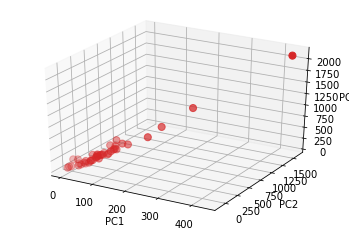

In [55]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca(projection='3d')
ax.scatter(dataframe['PC1'], dataframe['PC2'], dataframe['PC3'],s=50,c= '#d62728')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()